# Componentes conexos

Encontra os componentes conexos em uma imagem binária. É assumido que pixels pertencentes a um objeto possuem valor 1. 

O algoritmo consiste em percorrer a imagem duas vezes. Na primeira passagem, os seguintes passos são executados:

1. Percorra cada linha da imagem, da esquerda para a direita;
2. Para cada pixel com valor 1, verifique os valores dos pixels à esquerda e ao norte;
3. Chame o valor do pixel à esquerda de $𝑝_𝑒$ e o valor do pixel ao norte de $𝑝_𝑛$;
4. Se $𝑝_𝑒=0$ e $𝑝_𝑛=0$, associe um novo rótulo ao pixel atual;
5. Se ($𝑝_𝑒=1$ e $𝑝_𝑛=0$) ou ($𝑝_𝑒=0$ e $𝑝_𝑛=1$) ou ($𝑝_𝑒=1$ e $𝑝_𝑛=1$ e ambos os pixels possuem o mesmo rótulo), associe ao pixel atual o mesmo rótulo do pixel com valor 1
6. Se $𝑝_𝑒=1$ e $𝑝_𝑛=1$ e os pixels possuem rótulos diferentes, associe ao pixel atual o menor rótulo dentre os dois e armazene a equivalência entre os dois rótulos

Na segunda passagem, cada rótulo de um pixel é substituído pelo menor valor de rótulo equivalente (armazenado na primeira passagem sobre a imagem).


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def connected_components(img):
    '''Identifica componentes conexos em uma imagem binária img. É considerada vizinhança-4 para identificar
       os componentes.'''
    
    num_rows, num_cols = img.shape
    img_rotulo = np.zeros((num_rows, num_cols), dtype=int)
    current_label = 1        # rótulo atual a ser associado a um novo componente
    dict_lab_eq = {}         # Dicionário que armazena a equivalência entre rótulos num mesmo componente
    for row in range(num_rows):
        for col in range(num_cols):
            if img[row, col]==1:
                # As duas condicionais abaixo tratam o caso do pixel ser borda da imagem
                if row==0:
                    img_pn = 0
                else:
                    img_pn = img[row-1, col]
                    lab_pn = img_rotulo[row-1, col]     # Rótulo do pixel ao norte
                    
                if col==0:
                    img_pe = 0
                else:
                    img_pe = img[row, col-1]
                    lab_pe = img_rotulo[row, col-1]     # Rótulo do pixel à esquerda
                    
                if img_pn==0 and img_pe==0:
                    img_rotulo[row, col] = current_label
                    current_label += 1
                elif img_pn==0 and img_pe==1:
                    img_rotulo[row, col] = lab_pe
                elif img_pn==1 and img_pe==0:
                    img_rotulo[row, col] = lab_pn
                elif img_pn==1 and img_pe==1:
                    if lab_pe==lab_pn:
                        img_rotulo[row, col] = lab_pn
                    else:
                        if lab_pn<lab_pe:
                            img_rotulo[row, col] = lab_pn
                            dict_lab_eq[lab_pe] = lab_pn    # Armazena equivalência entre rótulos
                        else:
                            img_rotulo[row, col] = lab_pe
                            dict_lab_eq[lab_pn] = lab_pe    # Armazena equivalência entre rótulos
    
    # Podemos considerar que dict_lab_eq representa um grafo de relacionamentos entre
    # rótulos. Os nós do grafo representam rótulos e cada aresta direcionada saindo de
    # um nó i e apontando para um nó j indica que podemos substituir o rótulo i pelo rótulo j.
    # Com isso, para cada rótulo k, percorremos o grafo em profundidade para encontrar um
    # rótulo q que não possui nenuhma aresta saindo dele. Feito isso, armazenamos no dicionário
    # que o rótulo k pode ser substituído por q
    for key in dict_lab_eq:
        label = dict_lab_eq[key]
        while label in dict_lab_eq:
            label = dict_lab_eq[label]
        dict_lab_eq[key] = label
        
    # Se quisermos que os rótulos finais sejam a sequência
    # 1, 2, 3,..., podemos utilizar o dicionário criado abaixo 
    #k = 1
    #dict_map_index = {}
    #for label in range(1, curr_label):
    #    if label not in dict_lab_eq:
    #        dict_map_index[label] = k
    #        k += 1

    # Faz a segunda passagem sobre a imagem, substituindo os rótulos equivalentes
    for row in range(num_rows):
        for col in range(num_cols):
            label = img_rotulo[row, col]
            if label in dict_lab_eq:
                img_rotulo[row, col] = dict_lab_eq[label]
                
    return img_rotulo
                

## Testes da função

In [2]:
img_test = np.array([[0, 0, 1, 1],
                     [0, 1, 0, 1],
                     [1, 1, 1, 0]])
img_rotulo = connected_components(img_test)
print(img_rotulo)

[[0 0 1 1]
 [0 2 0 1]
 [2 2 2 0]]


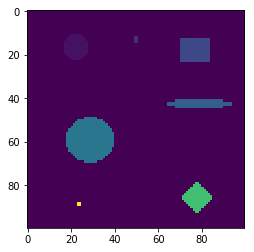

In [3]:
img = plt.imread('componentes.tiff')
# Objetos possuem valor 255 na imagem lida, o comando abaixo torna
# a imagem binária, com valores True e False (equivalentemente, 0 e 1)
img = img>0     
img_rotulo = connected_components(img)

plt.imshow(img_rotulo)

In [4]:
# A função abaixo identifica os valores únicos presentes no array img_rotulo
np.unique(img_rotulo)

array([ 0,  1,  3,  5,  7,  9, 16, 23])